In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Read the CSV file
# dataset_path = '/home/u1/Desktop/Gra_pr/QTransformer/dataset/Dataco_dataset/example_DataCoSupplyChainDataset.csv'
dataset_path = '/home/u1/Desktop/Gra_pr/QTransformer/dataset/Dataco_dataset/DataCoSupplyChainDataset.csv'
# dataset_path = 'dataset/DataCoSupplyChainDataset.csv'
# dataset_path = '/home/u1/Desktop/Gra_pr/QTransformer/dataset/Dataco_dataset/70k_DataCoSupplyChainDataset.csv'
df = pd.read_csv(dataset_path, encoding='ISO-8859-1')

df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
# Sắp xếp theo thời gian từ cũ đến mới
df = df.sort_values('order date (DateOrders)', ascending=True)


# Lọc đơn hàng hoàn thành
# df = df[df['Order Status'] == 'COMPLETE']
display(df.head())
print(f"Total number of orders: {len(df)}")
print(df.columns.to_list())

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
33833,CASH,2,4,88.790001,239.979996,Advance shipping,0,43,Camping & Hiking,Hickory,...,NaN,957,43,NaN,http://images.acmesports.sports/Diamondback+Wo...,Diamondback Women's Serene Classic Comfort Bi,299.980011,0,1/3/2015 0:00,Standard Class
77011,PAYMENT,3,4,91.180000,193.990005,Advance shipping,0,48,Water Sports,Chicago,...,NaN,1073,48,NaN,http://images.acmesports.sports/Pelican+Sunstr...,Pelican Sunstream 100 Kayak,199.990005,0,1/4/2015 0:21,Standard Class
109322,PAYMENT,3,4,68.250000,227.500000,Advance shipping,0,24,Women's Apparel,Chicago,...,NaN,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,1/4/2015 0:21,Standard Class
87884,PAYMENT,3,4,36.470001,107.889999,Advance shipping,0,18,Men's Footwear,Chicago,...,NaN,403,18,NaN,http://images.acmesports.sports/Nike+Men%27s+C...,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,0,1/4/2015 0:21,Standard Class
114915,CASH,5,4,33.590000,159.940002,Late delivery,1,46,Indoor/Outdoor Games,San Antonio,...,NaN,1014,46,NaN,http://images.acmesports.sports/O%27Brien+Men%...,O'Brien Men's Neoprene Life Vest,49.980000,0,1/6/2015 1:03,Standard Class


Total number of orders: 180519
['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product St

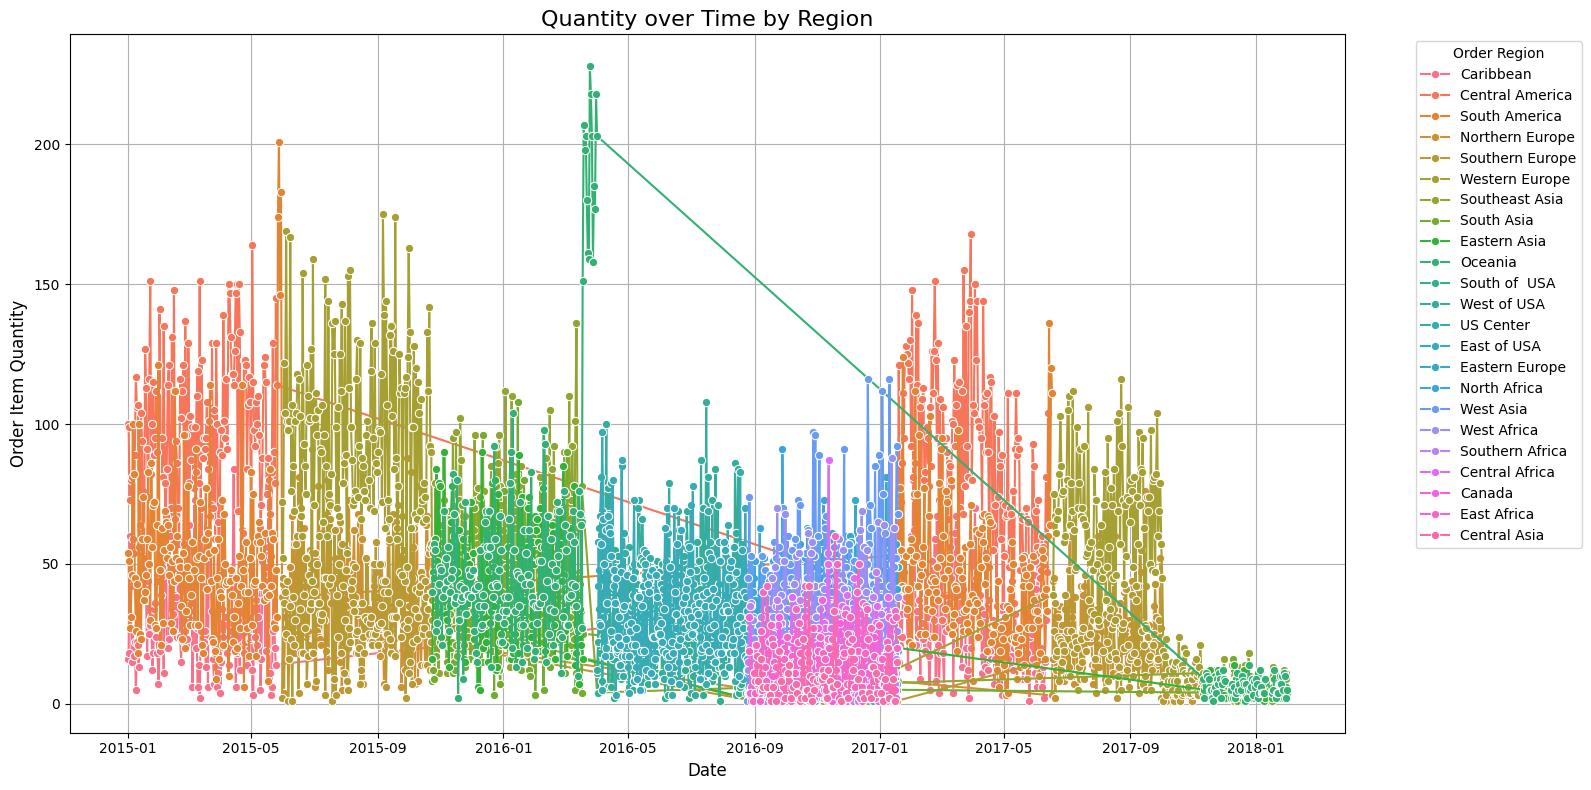

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file thống kê
df = pd.read_csv("order_quantity_by_region_per_day.csv")

# Chuyển ngày sang datetime
df['order_date_only'] = pd.to_datetime(df['order_date_only'], errors='coerce')

# Sort theo ngày để vẽ đúng thứ tự
df = df.sort_values(by='order_date_only')
# df = df[df['order_date_only'] >= "2016-09-01"]


# Vẽ line chart
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=df,
    x='order_date_only',
    y='Order Item Quantity',
    hue='Order Region',  # mỗi region 1 màu
    marker="o"
)

plt.title("Quantity over Time by Region", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Order Item Quantity", fontsize=12)
plt.legend(title="Order Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import plotly.express as px

# Đọc file
df = pd.read_csv("order_quantity_by_region_per_day.csv")
df['order_date_only'] = pd.to_datetime(df['order_date_only'], errors='coerce')

# Nếu muốn lọc từ 2016-09-01
# df = df[df['order_date_only'] >= "2016-09-01"]

# Vẽ biểu đồ line interactive
fig = px.line(
    df,
    x="order_date_only",
    y="Order Item Quantity",
    color="Order Region",
    title="Quantity over Time by Region",
    markers=True
)

# Tùy chỉnh giao diện
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Order Item Quantity",
    hovermode="x unified"
)

fig.show()


In [3]:
import pandas as pd
import plotly.express as px

# Đọc file thống kê đã có
df = pd.read_csv("order_quantity_by_region_per_day.csv")
df['order_date_only'] = pd.to_datetime(df['order_date_only'], errors='coerce')

# Sort để diff đúng thứ tự
df = df.sort_values(by=['Order Region', 'order_date_only'])

# Tính chênh lệch so với ngày trước trong cùng region
df['Quantity Change'] = df.groupby('Order Region')['Order Item Quantity'].diff()

# Nếu muốn bỏ các giá trị NaN (ngày đầu tiên mỗi region)
df = df.dropna(subset=['Quantity Change'])

# Vẽ biểu đồ line interactive
fig = px.line(
    df,
    x="order_date_only",
    y="Quantity Change",
    color="Order Region",
    title="Daily Change in Order Quantity by Region",
    markers=True
)

# Thêm đường y=0 để dễ nhìn tăng/giảm
fig.add_hline(y=0, line_dash="dash", line_color="gray")

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Quantity Change",
    hovermode="x unified"
)

fig.show()


In [4]:
import pandas as pd
import plotly.express as px

# Đọc file thống kê đã có
df = pd.read_csv("order_quantity_by_region_per_day.csv")
df['order_date_only'] = pd.to_datetime(df['order_date_only'], errors='coerce')

# Tính tổng quantity mỗi ngày (không phân biệt region)
daily_total = (
    df.groupby('order_date_only')['Order Item Quantity']
      .sum()
      .reset_index()
)

# Vẽ line chart
fig = px.line(
    daily_total,
    x="order_date_only",
    y="Order Item Quantity",
    title="Total Daily Order Quantity (All Regions)",
    markers=True
)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Total Quantity",
    hovermode="x unified"
)

fig.show()


In [5]:
import pandas as pd
import plotly.express as px

# Đọc file thống kê đã có
df = pd.read_csv("order_quantity_by_region_per_day.csv")
df['order_date_only'] = pd.to_datetime(df['order_date_only'], errors='coerce')

# Gộp dữ liệu theo tháng
df['YearMonth'] = df['order_date_only'].dt.to_period('M')  # YYYY-MM
monthly_total = (
    df.groupby('YearMonth')['Order Item Quantity']
      .sum()
      .reset_index()
)

# Chuyển YearMonth về datetime cho dễ vẽ
monthly_total['YearMonth'] = monthly_total['YearMonth'].dt.to_timestamp()

# Vẽ line chart
fig = px.line(
    monthly_total,
    x="YearMonth",
    y="Order Item Quantity",
    title="Total Monthly Order Quantity (All Regions)",
    markers=True
)

fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Total Quantity",
    hovermode="x unified"
)

fig.show()


In [7]:
# import pandas as pd

# # Đọc file
# df = pd.read_csv("dataset.csv")

# Parse ngày để tách phần date
df['order_date_only'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce').dt.date

# Nhóm theo region và ngày (chỉ ngày)
result = (
    df.groupby(['Order Region', 'order_date_only'])['Order Item Quantity']
      .sum()
      .reset_index()
)

# Sắp xếp theo ngày và region
result = result.sort_values(by=['order_date_only', 'Order Region'])

# Nếu muốn giữ dạng string thay vì datetime.date
result['order_date_only'] = result['order_date_only'].astype(str)

# Xuất file
result.to_csv("F_order_quantity_by_region_per_day.csv", index=False)

print(result.head())



         Order Region order_date_only  Order Item Quantity
104         Caribbean      2015-01-01                   40
514   Central America      2015-01-01                  205
2255    South America      2015-01-01                  110
105         Caribbean      2015-01-02                   79
515   Central America      2015-01-02                  172


In [ ]:
import pandas as pd

# Đọc file thống kê đã tạo
df = pd.read_csv("F_order_quantity_by_region_per_day.csv")

# Nếu cột ngày là string, parse về datetime để sort
df['order_date_only'] = pd.to_datetime(df['order_date_only'], errors='coerce')

# Sort theo ngày
df = df.sort_values(by='order_date_only')

# Lấy ngày đầu tiên mỗi region xuất hiện
first_dates = df.groupby('Order Region', as_index=False).first()

# # Xuất file kết quả
# first_dates.to_csv("first_day_each_region.csv", index=False)

print(first_dates)






       Order Region order_date_only  Order Item Quantity
0            Canada      2016-08-27                   58
1         Caribbean      2015-01-01                   40
2    Central Africa      2016-08-25                   26
3   Central America      2015-01-01                  205
4      Central Asia      2016-08-27                    1
5       East Africa      2016-08-27                   31
6       East of USA      2016-04-02                  124
7      Eastern Asia      2015-10-24                   38
8    Eastern Europe      2016-08-25                   46
9      North Africa      2016-08-25                   41
10  Northern Europe      2015-05-31                   78
11          Oceania      2015-10-24                   99
12    South America      2015-01-01                  110
13       South Asia      2015-10-24                   17
14   South of  USA       2016-04-01                   27
15   Southeast Asia      2015-10-24                   99
16  Southern Africa      2016-0

In [17]:
# buyer_features = ['Customer Country', 'Customer Segment', 'Category Name',
#                   'Order Item Product Price', 'Order Item Discount Rate', 'Order Item Profit Ratio',
#                   'Order Profit Per Order', 'Customer Id']
# seller_features = ['Order Region', 'Market', 'Category Name', 'Shipping Mode', 'Days for shipping (real)',
#                    'Late_delivery_risk', 'Department Name', 'Order Item Product Price',
#                    'Order Item Discount Rate', 'Order Item Profit Ratio', 'Order Profit Per Order']

buyer_features = ['Customer Country', 'Customer Segment',
                  'Order Item Product Price', 'Order Item Discount Rate', 'Order Item Profit Ratio',
                  'Order Profit Per Order', 'Customer Id']
seller_features = ['Order Region', 'Market', 'Shipping Mode', 'Days for shipping (real)',
                   'Late_delivery_risk', 'Order Item Product Price',
                   'Order Item Discount Rate', 'Order Item Profit Ratio', 'Order Profit Per Order']

# Hàm tổng hợp chuỗi thời gian
def create_time_series(df, group_cols, target_col='Order Item Quantity', freq='D'):
    ts_data = df.groupby(group_cols + [pd.Grouper(key='order date (DateOrders)', freq=freq)])[target_col].sum().reset_index()
    features = [col for col in df.columns if col not in ['order date (DateOrders)', target_col] + group_cols]
    feature_data = df.groupby(group_cols + [pd.Grouper(key='order date (DateOrders)', freq=freq)])[features].first().reset_index()
    ts_data = ts_data.merge(feature_data, on=group_cols + ['order date (DateOrders)'], how='left')
    ts_data = ts_data.sort_values('order date (DateOrders)', ascending=True)
    return ts_data

# Tạo dữ liệu cho người mua và người bán
buyer_levels = [['Customer Country']]
seller_levels = [['Order Region']]

for level in buyer_levels:
    ts_data = create_time_series(df, level)
    ts_data.to_csv(f'dataset/buyer_{"_".join(level).replace(" ", "_")}.csv', index=False)

for level in seller_levels:
    ts_data = create_time_series(df, level)
    ts_data.to_csv(f'dataset/seller_{"_".join(level).replace(" ", "_")}.csv', index=False)



In [18]:
# Mã hóa và chuẩn hóa
def preprocess_data(file_path, features):
    df = pd.read_csv(file_path)
    df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
    df = df.sort_values('order date (DateOrders)', ascending=True)
    
    cat_cols = [col for col in features if df[col].dtype == 'object']
    num_cols = [col for col in features if df[col].dtype != 'object']
    
    # Mã hóa đặc trưng danh mục
    enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
    if cat_cols:
        encoded = enc.fit_transform(df[cat_cols])
        encoded_cols = [f"{col}_{val}" for col, vals in zip(cat_cols, enc.categories_) for val in vals]
        df_encoded = pd.DataFrame(encoded, columns=encoded_cols)
    else:
        df_encoded = pd.DataFrame()
    
    # Chuẩn hóa đặc trưng số
    scaler = StandardScaler()
    if num_cols:
        scaled = scaler.fit_transform(df[num_cols])
        df_scaled = pd.DataFrame(scaled, columns=num_cols)
    else:
        df_scaled = pd.DataFrame()
    
    # Kết hợp
    df_processed = pd.concat([df[['order date (DateOrders)', 'Order Item Quantity']], df_scaled, df_encoded], axis=1)
    df_processed.to_csv(file_path.replace('.csv', '_processed.csv'), index=False)
    return len(encoded_cols) + len(num_cols) + 1  # +1 cho Order Item Quantity



In [7]:
import os

folder_path = "dataset"

for root, dirs, files in os.walk(folder_path):
    for filename in files:
        old_path = os.path.join(root, filename)
        
        # Đổi dấu cách thành dấu gạch dưới
        new_filename = filename.replace(" ", "_")
        new_path = os.path.join(root, new_filename)
        
        # Chỉ đổi tên nếu có sự thay đổi
        if old_path != new_path:
            os.rename(old_path, new_path)
            print(f"Đổi: {old_path}  -->  {new_path}")

print("Hoàn thành đổi tên file!")


Đổi: dataset/buyer_Customer Country_Customer State_processed.csv  -->  dataset/buyer_Customer_Country_Customer_State_processed.csv
Đổi: dataset/seller_Order Country_processed.csv  -->  dataset/seller_Order_Country_processed.csv
Đổi: dataset/buyer_Customer Country_Customer State_Customer City_processed.csv  -->  dataset/buyer_Customer_Country_Customer_State_Customer_City_processed.csv
Đổi: dataset/seller_Order Country_Order State_Order City_processed.csv  -->  dataset/seller_Order_Country_Order_State_Order_City_processed.csv
Đổi: dataset/seller_Order Country_Order State_processed.csv  -->  dataset/seller_Order_Country_Order_State_processed.csv
Đổi: dataset/seller_Order Country.csv  -->  dataset/seller_Order_Country.csv
Đổi: dataset/seller_Order Country_Order State_Order City.csv  -->  dataset/seller_Order_Country_Order_State_Order_City.csv
Đổi: dataset/buyer_Customer Country_Customer State_Customer City.csv  -->  dataset/buyer_Customer_Country_Customer_State_Customer_City.csv
Đổi: datas

In [ ]:
# Xử lý tất cả file
buyer_files = [f'dataset/buyer_{"_".join(level).replace(" ", "_")}.csv' for level in buyer_levels]
seller_files = [f'dataset/seller_{"_".join(level).replace(" ", "_")}.csv' for level in seller_levels]

buyer_enc_in = [preprocess_data(f, buyer_features) for f in buyer_files]
seller_enc_in = [preprocess_data(f, seller_features) for f in seller_files]

print(f"Buyer encoded input dimensions: {buyer_enc_in}")
print(f"Seller encoded input dimensions: {seller_enc_in}")

# Buyer encoded input dimensions: [11]
# Seller encoded input dimensions: [39]

/home/u1/Desktop/Gra_pr/QTransformer/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/u1/Desktop/Gra_pr/QTransformer/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Buyer encoded input dimensions: [11]
Seller encoded input dimensions: [39]
